# Silhoutte Score

$$S=\frac{b(v)-a(v)}{max(a,b)}$$

donde:

+ v:= vector de datos
+ a(v):=distancia media desde v al resto de vectores del mismo cluster
+ b(v):=distancia media desde v a los vectores del cluster más cercano


S pertenece al intervalo [-1,1], de tal manera que:

+ S=1  => buena clusterizacion
+ S=0  => overlapping
+ S=-1 => mala clusterizacion

In [1]:
from sklearn import cluster, datasets

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

import numpy as np

In [2]:
x, y = datasets.make_moons(n_samples = 1500, noise = 0.05)

In [3]:
x = StandardScaler().fit_transform(x)

In [4]:
x

array([[-0.14199321,  1.44632708],
       [-1.08717184,  1.1287539 ],
       [-0.31327311,  1.38706656],
       ...,
       [-0.29858713, -0.29132604],
       [-0.63468661,  0.20526975],
       [ 1.47658779, -0.74752067]])

In [20]:
help(cluster.AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
 |  
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |      If "precomputed", a dis

In [38]:
single = cluster.AgglomerativeClustering(n_clusters = 2, linkage = 'complete')

In [39]:
single.fit(x)

AgglomerativeClustering(linkage='complete')

In [40]:
y1_pred = single.labels_

In [41]:
set(y1_pred)

{0, 1}

In [42]:
kmeans = cluster.KMeans(n_clusters = 2)
kmeans.fit(x)

y2_pred= kmeans.predict(x)

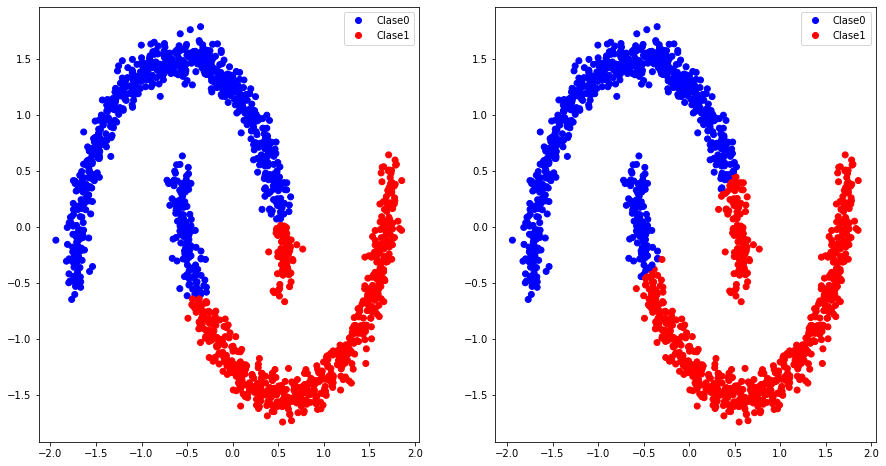

In [43]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

colors = np.array(['blue','red'])


legend_e = [Line2D([0],[0], color = c, marker ='o', linestyle = '', label = f'Clase{i}') for i,c in enumerate(colors)]

ax[0].scatter(x[:,0], x[:,1],  color = colors[y1_pred])
ax[0].legend(handles = legend_e, loc = 'upper right')

ax[1].scatter(x[:,0], x[:,1],  color = colors[y2_pred])
ax[1].legend(handles = legend_e, loc = 'upper right')

In [44]:
from sklearn.metrics import silhouette_score

In [45]:
print(f'modelo jerarquico : silhouette_score {silhouette_score(x, y1_pred)}')

print(f'modelo kmeans : silhouette_score {silhouette_score(x, y2_pred)}')

modelo jerarquico : silhouette_score 0.49303567567192774
modelo kmeans : silhouette_score 0.49907611444597144
